<a href="https://colab.research.google.com/github/gabisponciano/DesafioVoraz/blob/main/Age_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carregando Arquivo**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Desafio Voraz

Mounted at /content/drive
/content/drive/MyDrive/UFC/Extracurriculares/Desafio Voraz/Data


In [ ]:
#Ajustando os gráficos
fnts=12
fgs=(20/2, 6/2)
trs=0.3 # transparência
plt.style.use("ggplot")

## **Informações Gerais**



*   Ad Set Name: Nome do conjunto de anúncios.
* Platform: Plataforma em que o anúncio foi veiculado (neste caso, Facebook).
* Result Rate: Taxa de resultado.
* Result Indicator: Indicador de resultado.
* Results: Número de resultados obtidos.
* Reach: Alcance do anúncio (número de pessoas que viram o anúncio).
* Frequency: Frequência do anúncio (número médio de vezes que cada pessoa viu o anúncio).
* Link Clicks: Número de cliques no link do anúncio.
* CPC (Link) (USD): Custo por clique no link em dólares americanos.
* CPC (All) (USD): Custo por clique geral em dólares americanos.
* Cost per 1,000 People Reached (USD): Custo por 1.000 pessoas alcançadas em dólares americanos.
* CTR (All): Taxa de clique geral (%).
* Add to Cart (Facebook Pixel): Número de vezes que o produto foi adicionado ao carrinho (medido pelo pixel do Facebook).
* Cost per Add To Cart (Facebook Pixel) (USD): Custo por adicionar ao carrinho em dólares americanos.
* Initiate Checkout (Facebook Pixel): Número de vezes que o processo de checkout foi iniciado (medido pelo pixel do Facebook).
* Cost per Initiate Checkout (Facebook Pixel) (USD): Custo por iniciar o checkout em dólares americanos.
* Purchase (Facebook Pixel): Número de compras (medido pelo pixel do Facebook).
* Cost per Purchase (Facebook Pixel) (USD): Custo por compra em dólares americanos.
* Amount Spent (USD): Quantidade gasta em dólares americanos.
* Purchase Conversion Value (Facebook Pixel): Valor de conversão das compras (medido pelo pixel do Facebook).



## **Lendo**

In [ ]:
ageData = pd.read_csv('Growth-Internship-Test.xlsx - BY AGE.csv')
ageData.head()

,Ad Set Name,Age,Result Rate,Result Indicator,Results,Reach,Frequency,Link Clicks,CPC (Link) (USD),CPC (All) (USD),"Cost per 1,000 People Reached (USD)",CTR (All),Add to Cart (Facebook Pixel),Cost per Add To Cart (Facebook Pixel) (USD),Initiate Checkout (Facebook Pixel),Cost per Initiate Checkout (Facebook Pixel) (USD),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel)
0,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",18-24,"0,00%",-,0,65,"1,06",1,"$0,19","$0,05","$2,92","5,80%",0,"$0,00",0,"$0,00",0,"$0,00","$0,19","$0,00"
1,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",25-34,"0,00%",-,0,60,"1,02",1,"$0,17","$0,17","$2,83","1,64%",0,"$0,00",0,"$0,00",0,"$0,00","$0,17","$0,00"
2,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",35-44,"0,00%",-,0,3,"1,00",0,"$0,00","$0,00","$0,00","0,00%",0,"$0,00",0,"$0,00",0,"$0,00","$0,00","$0,00"
3,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",18-24,"0,00%",-,0,68,"1,00",0,"$0,00","$0,25","$3,68","1,47%",0,"$0,00",0,"$0,00",0,"$0,00","$0,25","$0,00"
4,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",25-34,"0,00%",-,0,41,"1,00",0,"$0,00","$0,00","$3,90","0,00%",0,"$0,00",0,"$0,00",0,"$0,00","$0,16","$0,00"


In [ ]:
# converter valores monetários
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace('.', '').replace(',', '.'))
    return value

In [ ]:
ageData['Amount Spent (USD)'] = ageData['Amount Spent (USD)'].apply(clean_currency)
ageData['Cost per Purchase (Facebook Pixel) (USD)'] = ageData['Cost per Purchase (Facebook Pixel) (USD)'].apply(clean_currency)
ageData['Purchase Conversion Value (Facebook Pixel)'] = ageData['Purchase Conversion Value (Facebook Pixel)'].apply(clean_currency)
ageData['Frequency'] = ageData['Frequency'].replace({',': '.'}, regex=True).astype(float)
ageData['CTR (All)'] = ageData['CTR (All)'].replace({'%': '', ',': '.'}, regex=True).astype(float)


In [ ]:
ageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11677 entries, 0 to 11676
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ad Set Name                                        4647 non-null   object 
 1   Age                                                4647 non-null   object 
 2   Result Rate                                        4647 non-null   object 
 3   Result Indicator                                   11677 non-null  object 
 4   Results                                            11677 non-null  int64  
 5   Reach                                              11677 non-null  int64  
 6   Frequency                                          11677 non-null  float64
 7   Link Clicks                                        11677 non-null  int64  
 8   CPC (Link) (USD)                                   11677 non-null  object 
 9   CPC (A

In [ ]:
ageData.describe()

,Results,Reach,Frequency,Link Clicks,CTR (All),Add to Cart (Facebook Pixel),Initiate Checkout (Facebook Pixel),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel),ROAS
count,4264.000000,4.264000e+03,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000
mean,718.708724,2.638465e+04,2.100762,350.674719,2.284815,50.153143,9.873593,2.221857,10.334547,49.836381,71.378865,1.173111
std,11896.308265,7.987698e+04,3.798382,1207.343846,3.207773,172.243529,32.816999,7.427342,19.688855,126.864398,238.876484,6.604067
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.000000,4.640000e+02,1.090000,4.000000,1.200000,0.000000,0.000000,0.000000,0.000000,1.990000,0.000000,0.000000
50%,2.000000,3.775500e+03,1.270000,32.000000,1.900000,5.000000,1.000000,0.000000,0.000000,10.280000,0.000000,0.000000
75%,19.000000,1.942500e+04,1.662500,187.000000,2.720000,29.000000,6.000000,1.000000,15.720000,42.440000,49.275000,1.105965
max,430613.000000,2.169278e+06,79.780000,21955.000000,100.000000,3478.000000,640.000000,152.000000,245.800000,2754.530000,4660.310000,355.714286


In [ ]:
ageData.isna().sum()

Ad Set Name                                          7030
Age                                                  7030
Result Rate                                          7030
Result Indicator                                        0
Results                                                 0
Reach                                                   0
Frequency                                               0
Link Clicks                                             0
CPC (Link) (USD)                                        0
CPC (All) (USD)                                         0
Cost per 1,000 People Reached (USD)                     0
CTR (All)                                               0
Add to Cart (Facebook Pixel)                            0
Cost per Add To Cart (Facebook Pixel) (USD)             0
Initiate Checkout (Facebook Pixel)                      0
Cost per Initiate Checkout (Facebook Pixel) (USD)       0
Purchase (Facebook Pixel)                               0
Cost per Purch

In [ ]:
ageData = ageData.dropna()
ageData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4647 entries, 0 to 4646
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ad Set Name                                        4647 non-null   object 
 1   Age                                                4647 non-null   object 
 2   Result Rate                                        4647 non-null   object 
 3   Result Indicator                                   4647 non-null   object 
 4   Results                                            4647 non-null   int64  
 5   Reach                                              4647 non-null   int64  
 6   Frequency                                          4647 non-null   float64
 7   Link Clicks                                        4647 non-null   int64  
 8   CPC (Link) (USD)                                   4647 non-null   object 
 9   CPC (All) (US

In [ ]:
# Calcular ROAS (Return on Ad Spend)
ageData['ROAS'] = ageData['Purchase Conversion Value (Facebook Pixel)'] / ageData['Amount Spent (USD)']

In [ ]:
ageData.astype('object').describe()

,Ad Set Name,Age,Result Rate,Result Indicator,Results,Reach,Frequency,Link Clicks,CPC (Link) (USD),CPC (All) (USD),...,CTR (All),Add to Cart (Facebook Pixel),Cost per Add To Cart (Facebook Pixel) (USD),Initiate Checkout (Facebook Pixel),Cost per Initiate Checkout (Facebook Pixel) (USD),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel),ROAS
count,4647,4647,4647,4647,4647,4647,4647.0,4647,4647,4647,...,4647.0,4647,4647,4647,4647,4647,4647.0,4647.0,4647.0,4264.0
unique,1071,7,574,8,451,3075,511.0,935,245,126,...,620.0,388,700,153,1284,66,1429.0,2662.0,960.0,1647.0
top,"LC Checkout-Conversion 04/09/2016 (Europe, Bal...",25-34,"0,00%",-,0,0,0.0,0,"$0,00","$0,00",...,0.0,0,"$0,00",0,"$0,00",0,0.0,0.0,0.0,0.0
freq,9,1088,1995,1902,1902,404,404.0,889,903,763,...,697.0,1789,1790,2338,2338,2994,2994.0,383.0,2994.0,2611.0


## **Por Idade**

In [ ]:
mode_age = ageData['Age'].value_counts()
mode_age.columns = ['Mode']
print(f'Mode:', mode_age.idxmax())

Mode: 25-34


**Purchases**

In [ ]:
printed_ages = set()
sum = 0

print('Intervalo de idades com mais de 200 compras:')
for age, count in mode_age.items():
    if count > 200 and age not in printed_ages:
        print(f"Intervalo '{age}': Quantidade = {count}")
        sum+= count
        printed_ages.add(age)

print(f"Total de compras: {sum}")

Intervalo de idades com mais de 200 compras:
Intervalo '25-34': Quantidade = 1088
Intervalo '18-24': Quantidade = 1081
Intervalo '35-44': Quantidade = 1074
Intervalo '13-17': Quantidade = 546
Intervalo '45-54': Quantidade = 362
Intervalo '65+': Quantidade = 260
Intervalo '55-64': Quantidade = 236
Total de compras: 4647


In [ ]:
mode_age_sorted = mode_age.sort_values(ascending=False)
mode_age_sorted

Age
25-34    1088
18-24    1081
35-44    1074
13-17     546
45-54     362
65+       260
55-64     236
Name: count, dtype: int64

**Reach** -Número de pessoas únicas que viram o anúncio.

In [ ]:
mode_reach = ageData.groupby('Age')['Reach'].sum()

In [ ]:
printed_ages = set()
sum_reach = 0

print('Intervalo de idades com mais de 10000 alcances:')
for age, reach in mode_reach.items():
    if reach > 10000 and age not in printed_ages:
        print(f"Intervalo de idade:'{age}': Alcance = {reach}")
        sum_reach += reach
        printed_ages.add(age)

print(f"Total de alcances: {sum_reach}")

Intervalo de idades com mais de 10000 alcances:
Intervalo de idade:'13-17': Alcance = 21751096
Intervalo de idade:'18-24': Alcance = 57350927
Intervalo de idade:'25-34': Alcance = 27071547
Intervalo de idade:'35-44': Alcance = 5331565
Intervalo de idade:'45-54': Alcance = 557577
Intervalo de idade:'55-64': Alcance = 147352
Intervalo de idade:'65+': Alcance = 294472
Total de alcances: 112504536


In [ ]:
mode_reach_sorted = mode_reach.sort_values(ascending=False)
mode_reach_sorted

Age
18-24    57350927
25-34    27071547
13-17    21751096
35-44     5331565
45-54      557577
65+        294472
55-64      147352
Name: Reach, dtype: int64

**Amount Spent** - Quantia total gasta na campanha, expressa em dólares.

In [ ]:
# ageData['Amount Spent (USD)'] = pd.to_numeric(ageData['Amount Spent (USD)'].str.replace(',', '').str.replace('$', ''), errors='coerce')

In [ ]:
mode_amount = ageData.groupby('Age')['Amount Spent (USD)'].sum()

In [ ]:
printed_ages = set()
sum_amount = 0

print('Intervalo de idade considerando o valor gasto na campanha:')
for age, amount in mode_amount.items():
    if amount > 1 and age not in printed_ages:
        print(f"Intervalo de idade '{age}': Quantidade Gasta (USD) = {amount}")
        sum_amount += amount
        printed_ages.add(age)

print(f"Quantidade total: {sum_amount}")

Intervalo de idade considerando o valor gasto na campanha:
Intervalo de idade '13-17': Quantidade Gasta (USD) = 29088.0
Intervalo de idade '18-24': Quantidade Gasta (USD) = 98947.94
Intervalo de idade '25-34': Quantidade Gasta (USD) = 69352.53
Intervalo de idade '35-44': Quantidade Gasta (USD) = 13608.01
Intervalo de idade '45-54': Quantidade Gasta (USD) = 1087.07
Intervalo de idade '55-64': Quantidade Gasta (USD) = 233.22
Intervalo de idade '65+': Quantidade Gasta (USD) = 185.56
Quantidade total: 212502.33000000002


In [ ]:
mode_amount_sorted = mode_amount.sort_values(ascending=False)
mode_amount_sorted

Age
18-24    98947.94
25-34    69352.53
13-17    29088.00
35-44    13608.01
45-54     1087.07
55-64      233.22
65+        185.56
Name: Amount Spent (USD), dtype: float64

**Link Clicks** = Número de cliques nos links do anúncio.

In [ ]:
mode_linkClick = ageData.groupby('Age')['Link Clicks'].sum()

In [ ]:
printed_ages = set()
sum_linkClick = 0

print('Quantidade de Clique em Links por grupo etário:')
for age, linkClick in mode_linkClick.items():
    if linkClick > 1 and age not in printed_ages:
        print(f"Age range '{age}': Link Click = {linkClick}")
        sum_linkClick += linkClick
        printed_ages.add(age)

print(f"Total de cliques: {sum_linkClick}")

Quantidade de Clique em Links por grupo etário:
Age range '13-17': Link Click = 343307
Age range '18-24': Link Click = 686358
Age range '25-34': Link Click = 363333
Age range '35-44': Link Click = 87956
Age range '45-54': Link Click = 9205
Age range '55-64': Link Click = 2282
Age range '65+': Link Click = 2841
Total de cliques: 1495282


In [ ]:
mode_linkClick_sorted = mode_linkClick.sort_values(ascending=False)
mode_linkClick_sorted

Age
18-24    686358
25-34    363333
13-17    343307
35-44     87956
45-54      9205
65+        2841
55-64      2282
Name: Link Clicks, dtype: int64

In [ ]:
ageData['Ad Set Name'].unique()

array(['LC Cart-Conversion 23/03/2017 (18-35, Europe+WW, Topics) - Zumba/Dieting',
       'LC Cart-Conversion 23/03/2017 (Europe+WW, Luxury Brands) - Different Insights - 3',
       'LC Cart-Conversion 23/03/2017 (Europe+WW, Luxury Brands) - Lancôme, Loir-et-Cher',
       ...,
       'LC Checkout-Conversion 02/09/2016 (13-44, Europe, iphone 5/5c) - Instagram',
       'LC Cart-Conversion 02/02/2017 (18-35, Europe+WW, Topics) - Exercise',
       'LC Checkout-Conversion 22/08/2016 (18-44, Europe, 5/5s)'],
      dtype=object)

In [ ]:
print('Número total de Ad Set Name:', len(ageData['Ad Set Name'].unique()))

Número total de Ad Set Name: 1071


In [ ]:
mode_ad_set = ageData['Ad Set Name'].value_counts()
mode_ad_set.columns = ['Mode']
print(f'Mode:', mode_ad_set.idxmax())

Mode: LC Checkout-Conversion 04/09/2016 (Europe, Ballet) - Instagram


In [ ]:
mode_ad_set_sorted = mode_ad_set.sort_values(ascending=False)
mode_ad_set_sorted.head(25)

Ad Set Name
LC Checkout-Conversion 04/09/2016 (Europe, Ballet) - Instagram          9
Viewed - 180 days - Italian                                             7
Viewed - 15 days - Italian                                              7
LC Engagement 05/02/2017 (13-65+, WW, Instagram)                        7
LC Checkout-Conversion 07/02/2017 (Europe, Valentines)                  7
LC Checkout-Conversion 30/09/2016 (Europe, Psychologist)                7
LC Checkout-Conversion 30/09/2016 (Europe, Psychologist) - Instagram    7
LC Engagement 09/02/2017 (13-65+, Europe+WW, Instagram)                 7
LC Conversion 09/02/2017 (18-65, World, Tops) - FB Engagers             7
LC Checkout-Conversion 01/10/2016 (Europe, Lawyer)                      7
LC Engagement 23/08/2016 (18-44, FR, Relationship)                      7
LC Checkout-Conversion 01/10/2016 (Europe, Lawyer) - Instagram          7
Viewed - 15 days - German                                               7
Viewed - 15 days - Spanish

## Gráficos

Criando dicionário para colocar as variáveis traduzidas

In [ ]:
translation_dict = {
    'Frequency': 'Frequência',
    'Cost per Purchase (Facebook Pixel) (USD)': 'Custo por Compra (USD)',
    'Results': 'Resultados',
    'Purchase (Facebook Pixel)': 'Compra',
    'ROAS': 'ROAS',
    'Amount Spent (USD)': 'Valor Gasto (USD)',
    'Link Clicks': 'Cliques no Link',
    'Reach': 'Alcance'
}

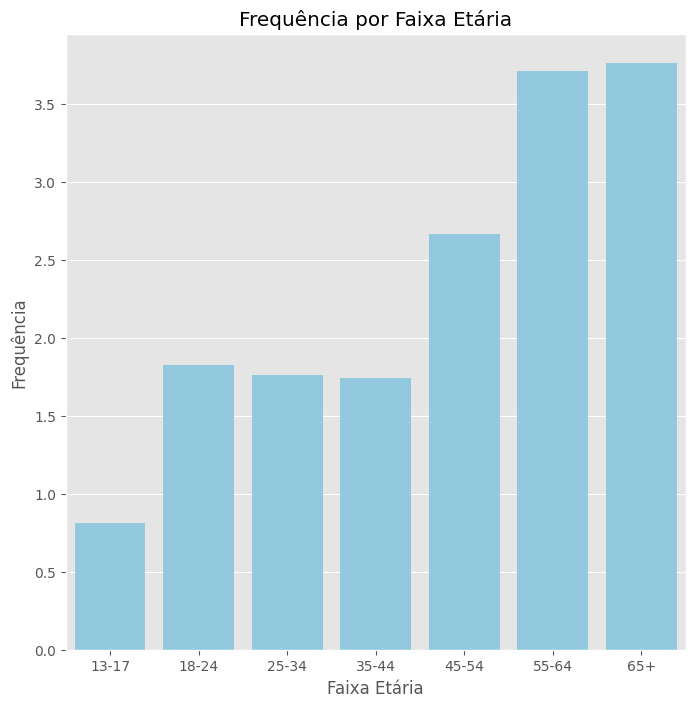

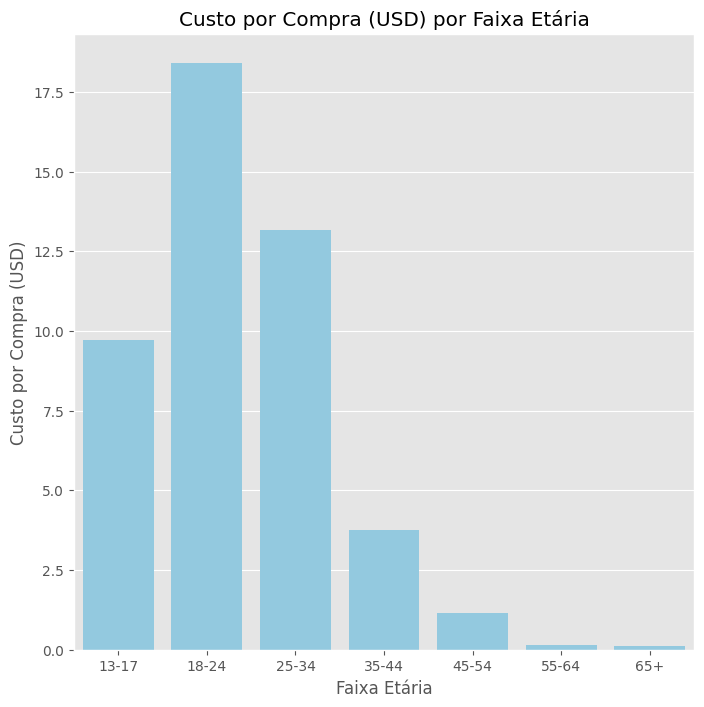

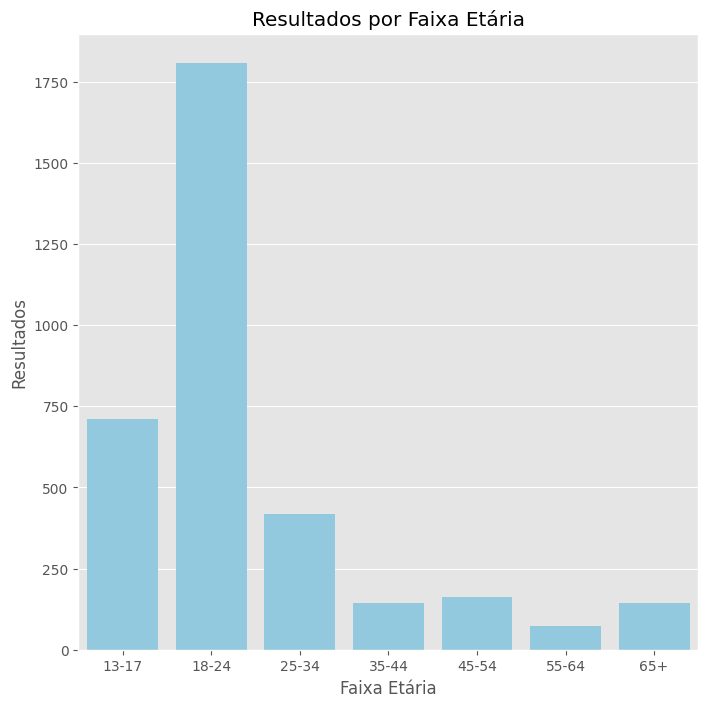

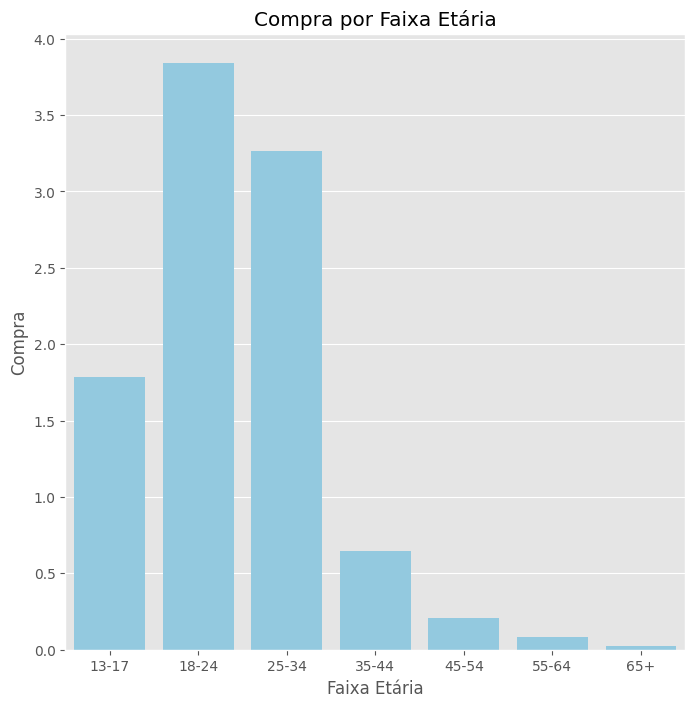

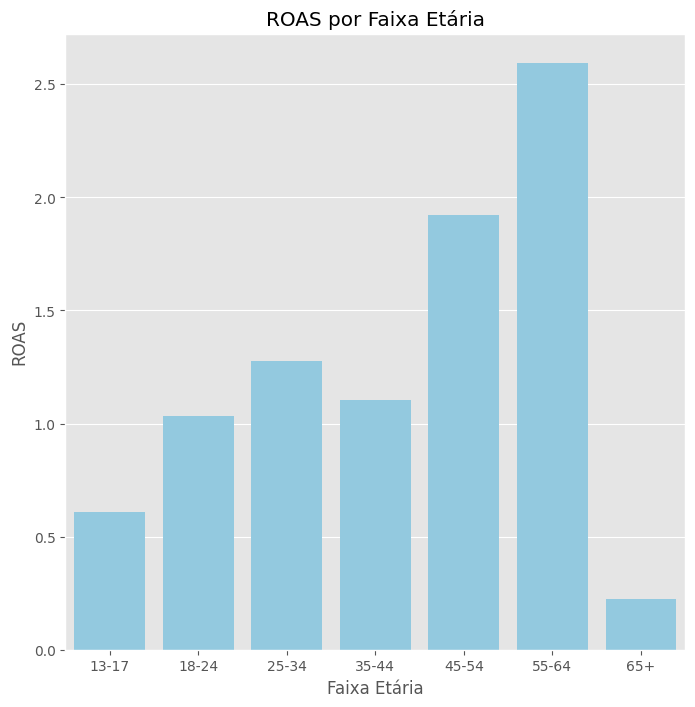

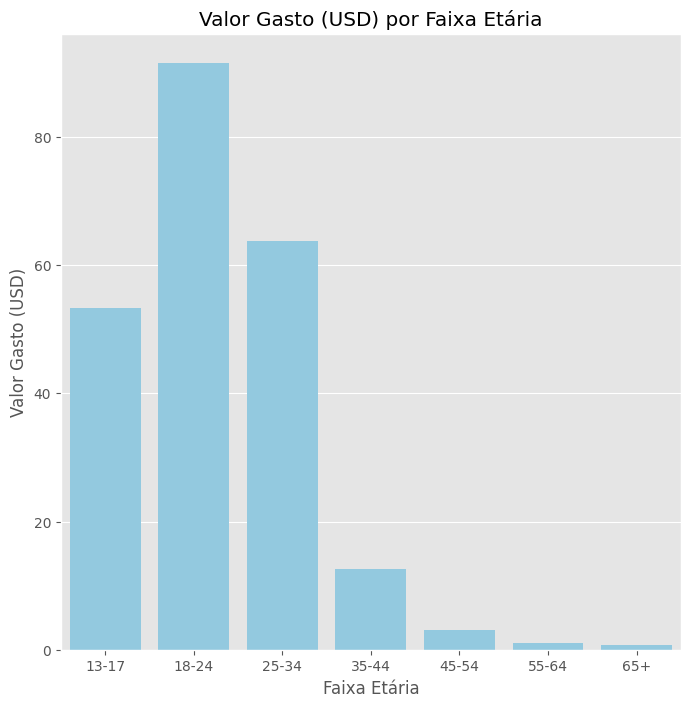

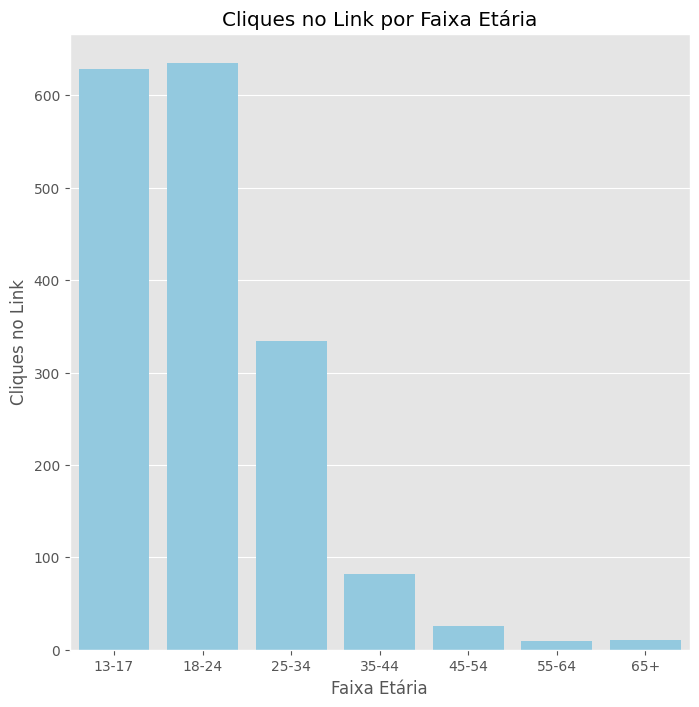

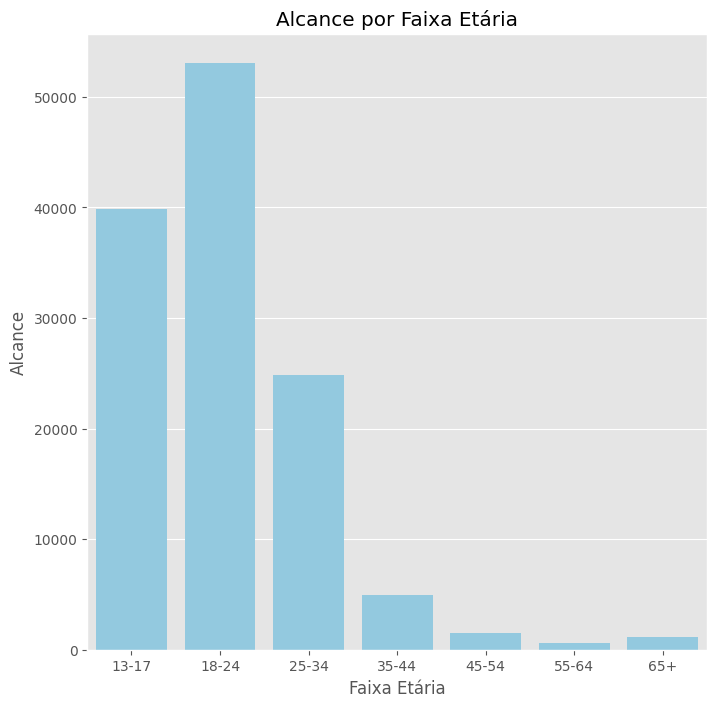

In [ ]:
columns = ['Frequency', 'Cost per Purchase (Facebook Pixel) (USD)', 'Results', 'Purchase (Facebook Pixel)', 'ROAS', 'Amount Spent (USD)', 'Link Clicks', 'Reach']
for column in columns:
  platform_performance = ageData.groupby('Age')[column].mean().reset_index()
  plt.figure(figsize=(8,8))
  sns.barplot(x='Age', y=column, data=platform_performance, color='skyblue')
  plt.xlabel('Faixa Etária')
  plt.ylabel(f'{translation_dict[column]}')
  plt.title(f'{translation_dict[column]}' + ' por Faixa Etária')
  plt.show()

In [ ]:
ageData.groupby('Age').size()

Age
13-17     340
18-24    1078
25-34    1084
35-44    1058
45-54     264
55-64     220
65+       220
dtype: int64